### PROJECT DESCRIPTION

The data set contains information about the sepsis illness. Using exploratory data analysis (EDA), I seek to gain more insights into the data. I ask questions that will serve as guide to better understand the data. Also, I will create a hypothesis that will be tested. This will help to give more insight into the data.
<br />
<br />
As a Data Scientist, I will create a machine learning model that will effectively classify the sepsis illness using the provided dataset.

### HYPOTHESIS FORMULATION

Null Hypothesis: There is no significant association between body mass index (BMI) values (M11) and the risk of sepsis.

Alternate Hypothesis: There is a significant association between body mass index (BMI) values (M11) and the risk of sepsis.

### EXPLORATORY QUESTIONS
1. What percentage of patients were sepssis positive?
2. What percentage of patients were sepssis negative?
3. How many patients had no insurance cover and were sepssis positive?
4. How many patients had insurance cover and were sepssis positive?
5. What are the mean, maximum and minimum age of sepssis positive patients?
6. What is the ratio of insurance holders to non-insurance holders?

### IMPORT PACKAGES

In [63]:
# Import pandas and numpy
import pandas as pd
import numpy as np

from scipy.stats import ttest_ind

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 4))
plt.style.use("fivethirtyeight")

# Import machine learning models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Pipeline, Scaler,Sampler, train_test_split, imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Import Encoders
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# import metrics
from sklearn.metrics import recall_score, mean_squared_log_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# import power bi into notebook to directly create visuals
from powerbiclient import QuickVisualize, get_dataset_config

# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication

# Initiate device authentication
#device_auth = DeviceCodeLoginAuthentication()

import os, pickle, joblib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', message='The default value of numeric_only in DataFrame.corr is deprecated')

<Figure size 1200x400 with 0 Axes>

### LOAD DATA

In [109]:
sepsis_train = pd.read_csv("Patients_Files_Train.csv")
sepsis_test = pd.read_csv("Patients_Files_Test.csv")

## EXPLORATORY DATA ANALYSIS

In [65]:
# check samples of train data

pd.options.display.max_columns = None
sepsis_train.sample(5, random_state=1)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
442,ICU200452,4,117,64,27,120,33.2,0.230,24,0,Negative
286,ICU200296,5,155,84,44,545,38.7,0.619,34,0,Negative
379,ICU200389,0,93,100,39,72,43.4,1.021,35,0,Negative
522,ICU200532,6,114,0,0,0,0.0,0.189,26,1,Negative
200,ICU200210,0,113,80,16,0,31.0,0.874,21,1,Negative


In [66]:
# Check basic info of train data

sepsis_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [67]:
# Check shape of train data

print(f"train dataframe shape: {sepsis_train.shape}")

train dataframe shape: (599, 11)


In [68]:
# Check for null values

sepsis_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

There are no null values in the data

In [69]:
# Check for duplicated values

sepsis_train.duplicated().any()

False

There are no duplicated values in the data

### UNIVARAITE ANALYSIS

In [70]:
# Check the value counts of target feature (Sepssis)
sepsis_train["Sepssis"].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

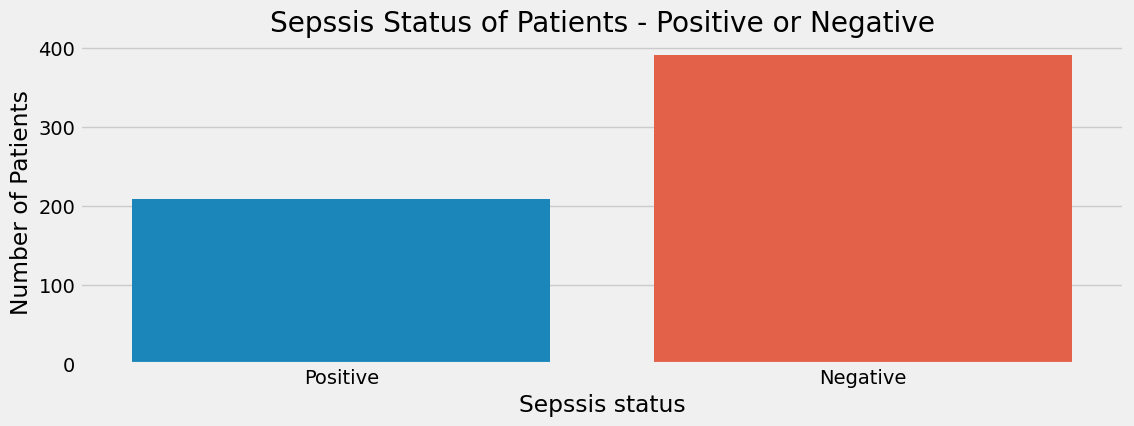

In [71]:
#Plot value counts on a graph
plt.figure(figsize=(12, 4))

sns.countplot(x='Sepssis', data=sepsis_train)
plt.title("Sepssis Status of Patients - Positive or Negative")
plt.xlabel('Sepssis status')
plt.ylabel('Number of Patients')
plt.show()

From the above graph, 391 patients were recorded as being Sepssis Negative, whereas 280 were recorded as being Sepssis Positive.

In [72]:
# Check the value counts of patients having insurance coverage
sepsis_train["Insurance"].value_counts()

1    411
0    188
Name: Insurance, dtype: int64

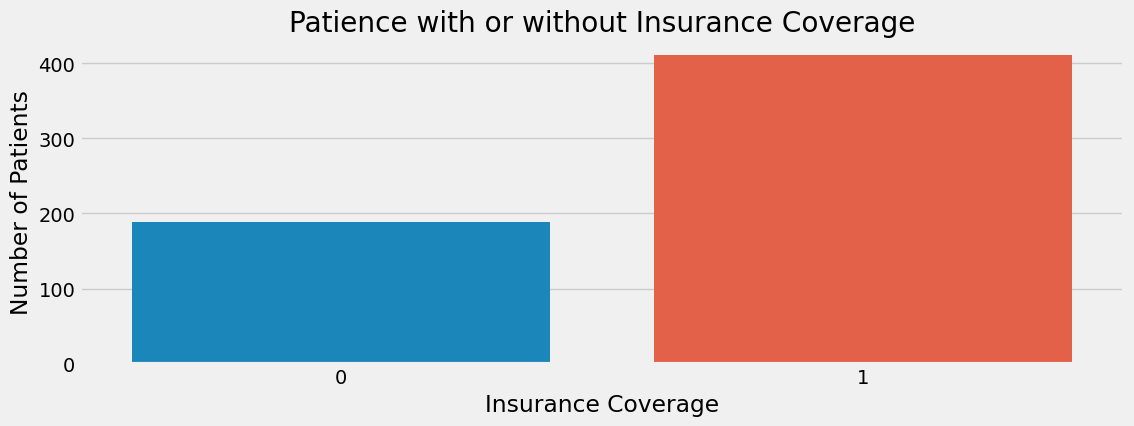

In [73]:
#Plot value counts on a graph

plt.figure(figsize=(12, 4))

sns.countplot(x='Insurance', data=sepsis_train)
plt.title("Patience with or without Insurance Coverage")
plt.xlabel('Insurance Coverage')
plt.ylabel('Number of Patients')
plt.show()

From the graph, 411 patients had insurance coverages whereas 118 patients had no insurance coverage.

### BIVARIATE ANALYSIS

In [74]:
# Check the minimum age of Sepssis Positive and Sepssis Negative patients

average_age = sepsis_train.groupby("Sepssis")["Age"].mean()
average_age

Sepssis
Negative    31.478261
Positive    36.697115
Name: Age, dtype: float64

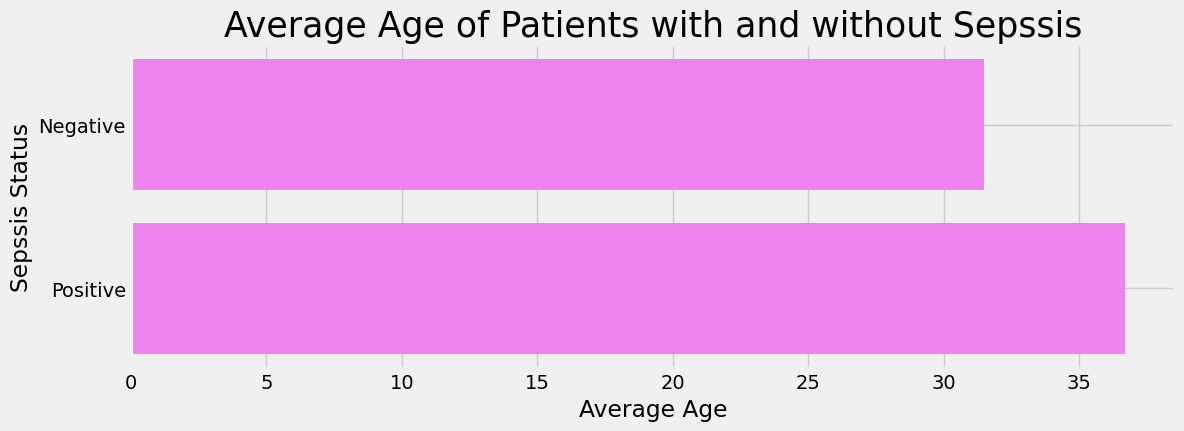

In [75]:
#Plot minimum age of patients on a graph
plt.figure(figsize=(12, 4))

average_age = sepsis_train.groupby("Sepssis")["Age"].mean()

plt.barh(average_age.index, average_age.values, color="violet")
plt.title("Average Age of Patients with and without Sepssis", fontsize=25)
plt.xlabel("Average Age")
plt.ylabel("Sepssis Status")
plt.xticks()
plt.yticks()
plt.gca().invert_yaxis()
plt.show()

The Average age of Patients without Sepssis is 31 years and the average age of patients with Sepssis is 37 years.

In [76]:
# Check the minimum age of Sepssis negative and Sepssis positive patients

min_age = sepsis_train.groupby("Sepssis")["Age"].min()
min_age

Sepssis
Negative    21
Positive    21
Name: Age, dtype: int64

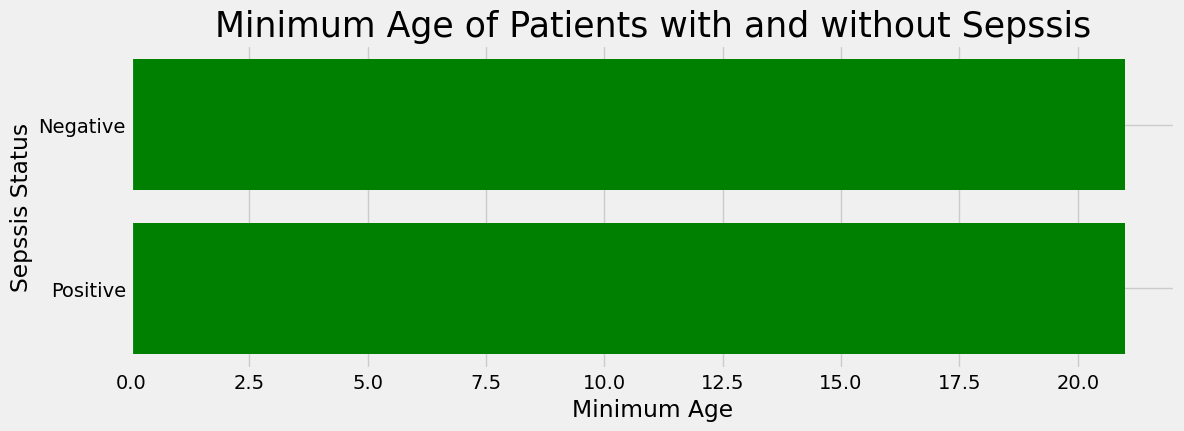

In [77]:
#Plot minimum age of patients on a graph
plt.figure(figsize=(12, 4))

min_age = sepsis_train.groupby("Sepssis")["Age"].min()

plt.barh(min_age.index, min_age.values, color="green")
plt.title("Minimum Age of Patients with and without Sepssis", fontsize=25)
plt.xlabel("Minimum Age")
plt.ylabel("Sepssis Status")
plt.xticks()
plt.yticks()
plt.gca().invert_yaxis()
plt.show()

The minimum age of patients with and without Sepssis is 21 years.

In [78]:
# Check the minimum age of Sepssis negative and Sepssis positive patients

max_age = sepsis_train.groupby("Sepssis")["Age"].max()
max_age

Sepssis
Negative    81
Positive    67
Name: Age, dtype: int64

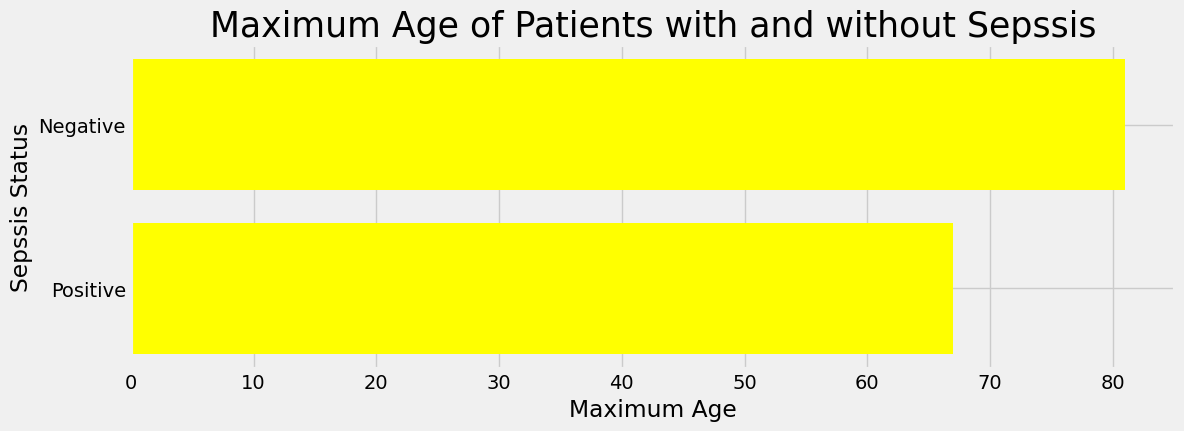

In [79]:
#Plot minimum age of patients on a graph
plt.figure(figsize=(12, 4))

max_age = sepsis_train.groupby("Sepssis")["Age"].max()

plt.barh(max_age.index, max_age.values, color="yellow")
plt.title("Maximum Age of Patients with and without Sepssis", fontsize=25)
plt.xlabel("Maximum Age")
plt.ylabel("Sepssis Status")
plt.xticks()
plt.yticks()
plt.gca().invert_yaxis()
plt.show()

The Maximum Age of Patients with Sepssis is 67 years and the Maximum Age of patients without Sepssis is 81 years.

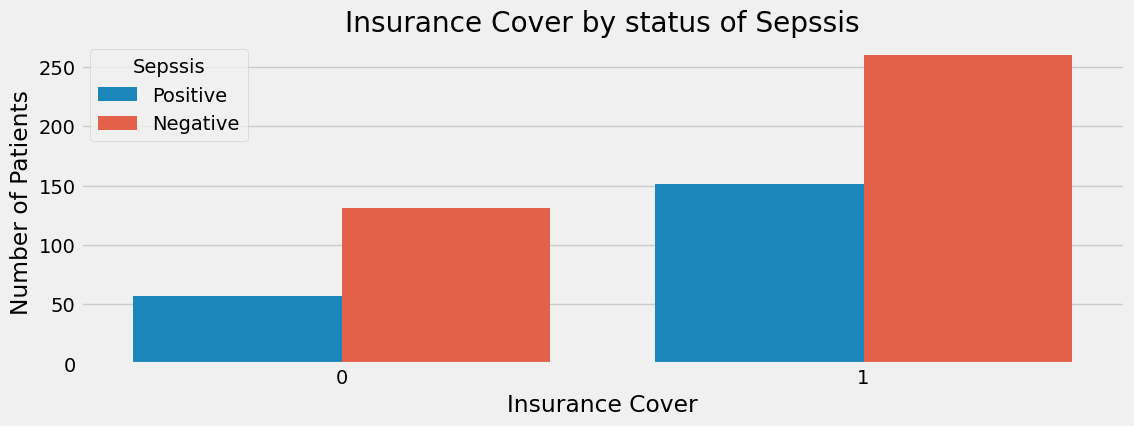

In [80]:
# Analying the Status of Patient by Insurance cover
plt.figure(figsize=(12, 4))

sns.countplot(x='Insurance', hue='Sepssis', data=sepsis_train)
plt.title('Insurance Cover by status of Sepssis')
plt.xlabel('Insurance Cover')
plt.ylabel('Number of Patients')

plt.show()

Fom the graph above; 
- Patients with sepssis and had no insurance cover were 60.
- Patients without sepssis and had no insurance cover were 130.
- Patients with sepssis and had insurance 155.
- Patients without sepssis and had insurance cover were 255.

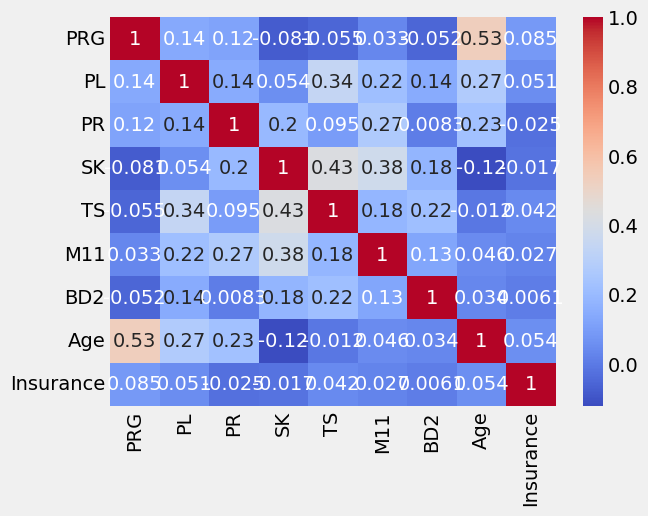

In [81]:
# Create correlation matrix

corr = sepsis_train.corr()

# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');
plt.show()

### HYPOTHESIS TESTING

In [82]:
# Separate the samples based on sepsis occurrence
positive_sepsis = sepsis_train[sepsis_train['Sepssis'] == 'Positive']
negative_sepsis = sepsis_train[sepsis_train['Sepssis'] == 'Negative']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(positive_sepsis['M11'], negative_sepsis['M11'])

# Print the t-test statistic and p-value
print('T-test statistic:', t_statistic)
print('P-value:', p_value)

T-test statistic: 8.134971813407034
P-value: 2.3972519626645312e-15


The p-value is significantly smaller than the commonly used significance level of 0.05, indicating strong evidence against the null hypothesis. Therefore, we can reject the null hypothesis and conclude that there is a significant association between body mass index (BMI) values (M11) and the risk of sepsis.

Furthermore, since the T-test statistic is positive, it suggests that patients with higher body mass index (BMI) values have a lower risk of sepsis. This provides support for the alternative hypothesis that patients with higher BMI values are less likely to develop sepsis.
 
In summary, the analysis suggests that there is a significant association between body mass index (BMI) values and the risk of sepsis, with higher BMI values being associated with a lower risk of sepsis.


### EXPLORATORY QUESTIONS

### FEATURE ENGINEERING AND  PROCESSING

In this section, the data will be cleaned and processed. Also, if the need be, new features will be created.

**IMPORTANT NOTICE:** There are no duplicates to be dropped and no missing values to be imputed. This was realized in the EDA

In [110]:
# Call the head of data
sepsis_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [111]:
# Drop ID column from dataset
sepsis_train.drop(columns="ID", inplace=True)

In [112]:
# Create target feature and predicting feature

X = sepsis_train.drop("Sepssis", axis=1) #predicting feature
y = sepsis_train[["Sepssis"]]  # target feature

In [113]:
# Split data into train and evaluation sets

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [114]:
#Check shape of training sets

X_train.shape, y_train.shape

((479, 9), (479, 1))

In [115]:
# Check shape of evaluationsets

X_eval.shape, y_eval.shape

((120, 9), (120, 1))

In [116]:
#Check the effectiveness of the stratified sampling

y_train.value_counts(normalize=True), y_eval.value_counts(normalize=True)

(Sepssis 
 Negative    0.653445
 Positive    0.346555
 dtype: float64,
 Sepssis 
 Negative    0.65
 Positive    0.35
 dtype: float64)

In [117]:
# Re-asign test data to a new varaibale called X_test

X_test = sepsis_test.copy()
X_test.drop(columns="ID", inplace=True)

In [118]:
# Check shape of X_test

X_test.shape

(169, 9)

### FEATURE ENCODING

In [119]:
#Encode categorical feature(y_train) with one hot encoder

encoder = OneHotEncoder(sparse_output=False, drop="first").fit(y_train)
encoded_cols = encoder.get_feature_names_out().tolist()

y_train_enc = pd.DataFrame(encoder.transform(y_train), columns=y_train.columns) 

In [120]:
# Encode categorical feature(y_eval) with one hot encoder

encoder = OneHotEncoder(sparse_output=False, drop="first").fit(y_eval)
encoded_cols = encoder.get_feature_names_out().tolist()

y_eval_enc = pd.DataFrame(encoder.transform(y_eval), columns=y_eval.columns)

In [121]:
# Check enocoded variable(y_eval_enc) against ctegorical variable (y_eval)

y_eval_enc.tail(), y_eval.tail()

(     Sepssis
 115      0.0
 116      0.0
 117      0.0
 118      0.0
 119      0.0,
       Sepssis
 517  Negative
 94   Negative
 496  Negative
 582  Negative
 436  Negative)

In [122]:
# Check enocoded variable(y_train_enc) against ctegorical variable (y_train)

y_train_enc.tail(), y_train.tail()

(     Sepssis
 474      0.0
 475      1.0
 476      1.0
 477      0.0
 478      0.0,
       Sepssis
 253  Negative
 230  Positive
 131  Positive
 107  Negative
 395  Negative)

In [123]:
# Check shape of encoded features

y_eval_enc.shape, y_train_enc.shape

((120, 1), (479, 1))

### Use imputer for Machine Learning

In [124]:
imputer = SimpleImputer(strategy='mean').fit(X_train)

In [125]:
X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
X_eval = pd.DataFrame(imputer.transform(X_eval), columns = X_eval.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns = X_eval.columns)

### FEATURE SCALING

In [127]:
# Use standard scaler to scale and fit numeric datasets

scaler = StandardScaler().fit(X_train)

In [128]:
# transform numeric datasets

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_eval_scaled = pd.DataFrame(scaler.transform(X_eval), columns=X_eval.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [129]:
# Check head of X_train_scaled

X_train_scaled.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.936259,-0.541760,0.292468,1.227874,0.278949,0.706624,-0.824511,0.991413,0.678503
1,0.936259,1.923458,0.812484,0.025886,1.108512,0.534049,0.260234,1.504619,-1.473834
2,-0.563634,-1.197071,0.188465,-0.353689,0.002429,-0.235902,0.149488,-0.719274,0.678503
3,-0.263656,1.892252,-0.227548,0.278936,-0.054783,0.281824,-0.634255,-0.633740,-1.473834
4,-1.163592,-1.103456,-0.227548,0.089149,-0.092923,0.520774,0.143808,-1.061412,0.678503


In [130]:
# Check head of X_eval_scaled

X_eval_scaled.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,-0.263656,-0.978634,-0.539557,-0.606739,-0.207346,-0.939477,-0.645614,-0.975877,0.678503
1,1.536217,1.143325,0.916487,0.468724,0.755709,0.321649,1.972541,0.734810,0.678503
2,-1.163592,-0.572966,-0.331551,-1.302627,-0.722247,-1.324452,-0.449678,-0.719274,0.678503
3,-0.563634,0.831272,0.396471,0.911561,1.127582,0.839374,-0.469556,-0.377137,0.678503
4,-1.163592,-0.167297,0.604477,0.848299,1.995285,1.635875,-0.929578,-0.548206,0.678503


In [131]:
# Check head of X_test_scaled

X_test_scaled.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,-0.863613,-0.323323,-1.579588,-0.163901,0.421977,-1.165152,-0.248063,-0.633740,0.678503
1,-0.863613,-0.354529,1.020490,-0.100639,-0.722247,-0.634152,-0.267941,-0.804809,0.678503
2,0.636281,-0.728992,-3.555647,-1.302627,-0.722247,-1.085502,-0.864267,-0.462671,0.678503
3,-0.863613,0.144756,0.292468,0.974824,-0.722247,-0.541227,-1.119835,-0.291603,0.678503
4,0.936259,0.956094,0.500474,0.531986,0.479189,0.441124,0.561236,1.761222,-1.473834


### MACHINE LEARNING MODELING

In this section, we are going to use our processed datasets to build, train, evaluate and compare four models.
The models to be used are;
- K Nearest Neighbor
- Decision Tree Classifier
- Gradient Boosting Machines
- Neural Networks

The evaluation metric will be their Root Mean Squared Errors, Accuracy, F-1 score

### K Nearest Neighbor

In [132]:
# Define the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model on the training dataset
knn.fit(X_train_scaled, y_train_enc)

C:\Users\elvis_d\DATA_ANALYTICS\venv_da\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [133]:
# Make predictions on the eval dataset
y_pred = pd.DataFrame(knn.predict(X_eval_scaled), columns=["Sepssis"])
y_pred.tail()

,Sepssis
115,0.0
116,0.0
117,0.0
118,0.0
119,0.0


In [134]:
# Concat evluation data and predicted to have a glance of full dataset

knn_data = pd.concat([X_eval_scaled, y_pred], axis=1)
knn_data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,-0.263656,-0.978634,-0.539557,-0.606739,-0.207346,-0.939477,-0.645614,-0.975877,0.678503,0.0
1,1.536217,1.143325,0.916487,0.468724,0.755709,0.321649,1.972541,0.734810,0.678503,1.0
2,-1.163592,-0.572966,-0.331551,-1.302627,-0.722247,-1.324452,-0.449678,-0.719274,0.678503,0.0
3,-0.563634,0.831272,0.396471,0.911561,1.127582,0.839374,-0.469556,-0.377137,0.678503,0.0
4,-1.163592,-0.167297,0.604477,0.848299,1.995285,1.635875,-0.929578,-0.548206,0.678503,0.0


In [135]:
# Check classification report

cr = classification_report(y_eval_enc, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79        78
         1.0       0.62      0.57      0.59        42

    accuracy                           0.73       120
   macro avg       0.70      0.69      0.69       120
weighted avg       0.72      0.72      0.72       120



In [136]:
# Evaluate the metric scores of the K Nearest neighboour model

# Calculate the accuracy score
knn_accuracy = accuracy_score(y_eval_enc, y_pred)

# Calculate the precision score
knn_precision = precision_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the recall score
knn_recall = recall_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the F1-score
knn_f1 = f1_score(y_eval_enc, y_pred, pos_label=0.0)

# Calculate the Root Mean Squared Log Error(RMSLE)
knn_rmsle = np.sqrt(mean_squared_log_error(y_eval_enc, y_pred)).round(2)


# Print the evaluation metrics
print("Accuracy: {:.2f}".format(knn_accuracy))
print("Precision: {:.2f}".format(knn_precision))
print("Recall: {:.2f}".format(knn_recall))
print("F1-score: {:.2f}".format(knn_f1))
print("RMSLE: {:.2f}".format(knn_rmsle))

Accuracy: 0.72
Precision: 0.62
Recall: 0.57
F1-score: 0.79
RMSLE: 0.36


### Gradient Boosting Machines

In [137]:
# Initialize the GBM classifier with default hyperparameters
gbm = GradientBoostingClassifier()

# Fit the GBM model on the training dataset
gbm.fit(X_train_scaled, y_train_enc)

C:\Users\elvis_d\DATA_ANALYTICS\venv_da\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [138]:
# Make predictions on the eval dataset

y_pred = pd.DataFrame(gbm.predict(X_eval_scaled), columns=["Sepssis"])
y_pred.tail()

,Sepssis
115,1.0
116,0.0
117,0.0
118,0.0
119,1.0


In [139]:
# Concat evluation data and predicted to have a glance of full dataset

gbm_data = pd.concat([X_eval_scaled, y_pred], axis=1)
gbm_data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,-0.263656,-0.978634,-0.539557,-0.606739,-0.207346,-0.939477,-0.645614,-0.975877,0.678503,0.0
1,1.536217,1.143325,0.916487,0.468724,0.755709,0.321649,1.972541,0.734810,0.678503,1.0
2,-1.163592,-0.572966,-0.331551,-1.302627,-0.722247,-1.324452,-0.449678,-0.719274,0.678503,0.0
3,-0.563634,0.831272,0.396471,0.911561,1.127582,0.839374,-0.469556,-0.377137,0.678503,0.0
4,-1.163592,-0.167297,0.604477,0.848299,1.995285,1.635875,-0.929578,-0.548206,0.678503,0.0


In [140]:
# Check classification report

cr = classification_report(y_eval_enc, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79        78
         1.0       0.61      0.52      0.56        42

    accuracy                           0.72       120
   macro avg       0.69      0.67      0.68       120
weighted avg       0.71      0.72      0.71       120



In [141]:
# Evaluate the metric scores of the gradient boosting model

# Calculate the accuracy score
gbm_accuracy = accuracy_score(y_eval_enc, y_pred)

# Calculate the precision score
gbm_precision = precision_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the recall score
gbm_recall = recall_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the F1-score
gbm_f1 = f1_score(y_eval_enc, y_pred, pos_label=0.0)

# Calculate the Root Mean Squared Log Error(RMSLE)
gbm_rmsle = np.sqrt(mean_squared_log_error(y_eval_enc, y_pred)).round(2)


# Print the evaluation metrics
print("Accuracy: {:.2f}".format(gbm_accuracy))
print("Precision: {:.2f}".format(gbm_precision))
print("Recall: {:.2f}".format(gbm_recall))
print("F1-score: {:.2f}".format(gbm_f1))
print("RMSLE: {:.2f}".format(gbm_rmsle))

Accuracy: 0.72
Precision: 0.61
Recall: 0.52
F1-score: 0.79
RMSLE: 0.37


### Decision Tree Classifier

In [142]:
# Initialize the Decsion Tree classifier with default hyperparameters
dt = DecisionTreeClassifier()

# Fit the Decision Tree model on the training dataset
dt.fit(X_train_scaled, y_train_enc)

DecisionTreeClassifier()

In [143]:
# Make predictions on the eval dataset

y_pred = pd.DataFrame(dt.predict(X_eval_scaled), columns=["Sepssis"])
y_pred.tail()

,Sepssis
115,1.0
116,0.0
117,0.0
118,0.0
119,1.0


In [144]:
# Concat evluation data and predicted to have a glance of full dataset

dt_data = pd.concat([X_eval_scaled, y_pred], axis=1)
dt_data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,-0.263656,-0.978634,-0.539557,-0.606739,-0.207346,-0.939477,-0.645614,-0.975877,0.678503,0.0
1,1.536217,1.143325,0.916487,0.468724,0.755709,0.321649,1.972541,0.734810,0.678503,1.0
2,-1.163592,-0.572966,-0.331551,-1.302627,-0.722247,-1.324452,-0.449678,-0.719274,0.678503,0.0
3,-0.563634,0.831272,0.396471,0.911561,1.127582,0.839374,-0.469556,-0.377137,0.678503,1.0
4,-1.163592,-0.167297,0.604477,0.848299,1.995285,1.635875,-0.929578,-0.548206,0.678503,0.0


In [145]:
# Check classification report

cr = classification_report(y_eval_enc, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79        78
         1.0       0.60      0.62      0.61        42

    accuracy                           0.73       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.73      0.72      0.73       120



In [146]:
# Evaluate the metric scores of the Decisonn Tree model

# Calculate the accuracy score
dt_accuracy = accuracy_score(y_eval_enc, y_pred)

# Calculate the precision score
dt_precision = precision_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the recall score
dt_recall = recall_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the F1-score
dt_f1 = f1_score(y_eval_enc, y_pred, pos_label=0.0)

# Calculate the Root Mean Squared Log Error(RMSLE)
dt_rmsle = np.sqrt(mean_squared_log_error(y_eval_enc, y_pred)).round(2)


# Print the evaluation metrics
print("Accuracy: {:.2f}".format(dt_accuracy))
print("Precision: {:.2f}".format(dt_precision))
print("Recall: {:.2f}".format(dt_recall))
print("F1-score: {:.2f}".format(dt_f1))
print("RMSLE: {:.2f}".format(dt_rmsle))

Accuracy: 0.72
Precision: 0.60
Recall: 0.62
F1-score: 0.79
RMSLE: 0.36


### Neural Networks

In [147]:
# Define the MLP classifier with 1 hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Fit the MLP model on the training dataset
mlp.fit(X_train_scaled, y_train_enc)

C:\Users\elvis_d\DATA_ANALYTICS\venv_da\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

In [148]:
# Make predictions on the eval dataset

y_pred = pd.DataFrame(mlp.predict(X_eval_scaled), columns=["Sepssis"])
y_pred.tail()

,Sepssis
115,0.0
116,0.0
117,0.0
118,0.0
119,1.0


In [149]:
# Concat evluation data and predicted to have a glance of full dataset

mlp_data = pd.concat([X_eval_scaled, y_pred], axis=1)
mlp_data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,-0.263656,-0.978634,-0.539557,-0.606739,-0.207346,-0.939477,-0.645614,-0.975877,0.678503,0.0
1,1.536217,1.143325,0.916487,0.468724,0.755709,0.321649,1.972541,0.734810,0.678503,1.0
2,-1.163592,-0.572966,-0.331551,-1.302627,-0.722247,-1.324452,-0.449678,-0.719274,0.678503,0.0
3,-0.563634,0.831272,0.396471,0.911561,1.127582,0.839374,-0.469556,-0.377137,0.678503,1.0
4,-1.163592,-0.167297,0.604477,0.848299,1.995285,1.635875,-0.929578,-0.548206,0.678503,0.0


In [150]:
# Check classification report

cr = classification_report(y_eval_enc, y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.76        78
         1.0       0.56      0.57      0.56        42

    accuracy                           0.69       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.69      0.69      0.69       120



In [151]:
# Evaluate the metric scores of the Decisonn Tree model

# Calculate the accuracy score
mlp_accuracy = accuracy_score(y_eval_enc, y_pred)

# Calculate the precision score
mlp_precision = precision_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the recall score
mlp_recall = recall_score(y_eval_enc, y_pred, pos_label=1.0)

# Calculate the F1-score
mlp_f1 = f1_score(y_eval_enc, y_pred, pos_label=0.0)

# Calculate the Root Mean Squared Log Error(RMSLE)
mlp_rmsle = np.sqrt(mean_squared_log_error(y_eval_enc, y_pred)).round(2)


# Print the evaluation metrics
print("Accuracy: {:.2f}".format(mlp_accuracy))
print("Precision: {:.2f}".format(mlp_precision))
print("Recall: {:.2f}".format(mlp_recall))
print("F1-score: {:.2f}".format(mlp_f1))
print("RMSLE: {:.2f}".format(mlp_rmsle))

Accuracy: 0.69
Precision: 0.56
Recall: 0.57
F1-score: 0.76
RMSLE: 0.38


### Evaluation for all Models

In [152]:
#Summary of the results
evaluation_metrics = ['ACCURACY', 'PRECISION', 'RECALL', 'F1-SCORE', 'RMSLE']

models = ['k Nearest Neighbour', 'Gradient Boosting', 'Decsion Tree Classifier', 'Neural Networks']

results = [[knn_accuracy, knn_precision, knn_recall, knn_f1, knn_rmsle],
           [gbm_accuracy, gbm_precision, gbm_recall, gbm_f1, gbm_rmsle],
           [dt_accuracy, dt_precision, dt_recall, dt_f1, dt_rmsle],
           [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1,mlp_rmsle]]

results_table = pd.DataFrame(data=results, columns=evaluation_metrics, index=models)
results_table

,ACCURACY,PRECISION,RECALL,F1-SCORE,RMSLE
k Nearest Neighbour,0.725000,0.615385,0.571429,0.792453,0.36
Gradient Boosting,0.716667,0.611111,0.523810,0.790123,0.37
Decsion Tree Classifier,0.725000,0.604651,0.619048,0.787097,0.36
Neural Networks,0.691667,0.558140,0.571429,0.761290,0.38


The best performing model is the DecisonTree Classifier

### Save best performing model to local machine

In [153]:
# # Save selected model to disk (Decision tree classifier)
filename = "sepssis_predict.joblib"
joblib.dump(dt, filename)

['sepssis_predict.joblib']

### save standard scaler

In [154]:
filename = "scaler.joblb"
joblib.dump(scaler, filename)

['scaler.joblb']

### Save Imputer

In [155]:
filename = "imputer.joblb"
joblib.dump(imputer, filename)

['imputer.joblb']

### Use saved model to predict Sepssis status using test data

In [156]:
# Load the trained model from disk
loaded_model = joblib.load('sepssis_predict.joblib')

# load predicted values in a dataframe
y_pred = pd.DataFrame(loaded_model.predict(X_test ), columns=["Sepssis"])

# Concact predicted values with test dataset to get a clear view of predicting and target features
pred = pd.concat([X_test, y_pred], axis=1)
pred

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,1.0,109.0,38.0,18.0,120.0,23.1,0.407,26.0,1.0,0.0
1,1.0,108.0,88.0,19.0,0.0,27.1,0.400,24.0,1.0,1.0
2,6.0,96.0,0.0,0.0,0.0,23.7,0.190,28.0,1.0,0.0
3,1.0,124.0,74.0,36.0,0.0,27.8,0.100,30.0,1.0,1.0
4,7.0,150.0,78.0,29.0,126.0,35.2,0.692,54.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
164,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,1.0,0.0
165,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,1.0,1.0
166,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,1.0,0.0
167,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0,0.0


In [157]:
# Check the value counts of predicted values
pred["Sepssis"].value_counts()

0.0    134
1.0     35
Name: Sepssis, dtype: int64

From the predicted values, there are 134 sepssis negative cases and 35 sepssis positive cases